# Logistic Regression


Researchers are often interested in setting up a model to analyze the relationship between predictors (i.e., independent variables) and it's corresponsing response (i.e., dependent variable). Linear regression is commonly used when the response variable is continuous.  One assumption of linear models is that the residual errors follow a normal distribution. This assumption fails when the response variable is categorical, so an ordinary linear model is not appropriate. This newsletter presents a regression model for response variable that is dichotomous–having two categories. Examples are common: whether a plant lives or dies, whether a survey respondent agrees or disagrees with a statement, or whether an at-risk child graduates or drops out from high school.

In ordinary linear regression, the response variable (Y) is a linear function of the coefficients (B0, B1, etc.) that correspond to the predictor variables (X1, X2, etc.,). A typical model would look like:

    Y = B0 + B1*X1 + B2*X2 + B3*X3 + … + E

For a dichotomous response variable, we could set up a similar linear model to predict individual category memberships if numerical values are used to represent the two categories. Arbitrary values of 1 and 0 are chosen for mathematical convenience. Using the first example, we would assign Y = 1 if a plant lives and Y = 0 if a plant dies.

This linear model does not work well for a few reasons. First, the response values, 0 and 1, are arbitrary, so modeling the actual values of Y is not exactly of interest. Second, it is the probability that each individual in the population responds with 0 or 1 that we are interested in modeling. For example, we may find that plants with a high level of a fungal infection (X1) fall into the category “the plant lives” (Y) less often than those plants with low level of infection. Thus, as the level of infection rises, the probability of plant living decreases.

Thus, we might consider modeling P, the probability, as the response variable. Again, there are problems. Although the general decrease in probability is accompanied by a general increase in infection level, we know that P, like all probabilities, can only fall within the boundaries of 0 and 1. Consequently, it is better to assume that the relationship between X1 and P is sigmoidal (S-shaped), rather than a straight line.

It is possible, however, to find a linear relationship between X1 and function of P. Although a number of functions work, one of the most useful is the logit function. It is the natural log of the odds that Y is equal to 1, which is simply the ratio of the probability that Y is 1 divided by the probability that Y is 0. The relationship between the logit of P and P itself is sigmoidal in shape. The regression equation that results is:

    ln[P/(1-P)] = B0 + B1*X1 + B2*X2 + …

Although the left side of this equation looks intimidating, this way of expressing the probability results in the right side of the equation being linear and looking familiar to us. This helps us understand the meaning of the regression coefficients. The coefficients can easily be transformed so that their interpretation makes sense.

The logistic regression equation can be extended beyond the case of a dichotomous response variable to the cases of ordered categories and polytymous categories (more than two categories).

## Learning Algorithm

## Logistic Regression with statsmodel

We'll be using the same dataset as UCLA's Logit Regression tutorial to explore logistic regression in Python. Our goal will be to identify the various factors that may influence admission into graduate school.

The dataset contains several columns which we can use as predictor variables:

   * gpa
   * gre score
   * rank or prestige of an applicant's undergraduate alma mater
   * The fourth column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.

In [10]:
#IMPORT STATEMENTS
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

In [20]:
# read the data in
df = pd.read_csv("binary.csv")

In [21]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [34]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
print(df.head)
df.head()

<bound method NDFrame.head of      admit  gre   gpa  prestige
0        0  380  3.61         3
1        1  660  3.67         3
2        1  800  4.00         1
3        1  640  3.19         4
4        0  520  2.93         4
..     ...  ...   ...       ...
395      0  620  4.00         2
396      0  560  3.04         3
397      0  460  2.63         2
398      0  700  3.65         2
399      0  600  3.89         3

[400 rows x 4 columns]>


,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


### Summary Statistics & Looking at the data
Now that we've got everything loaded into Python and named appropriately let's take a look at the data. We can use the pandas function which describes a summarized view of everything. There's also function for calculating the standard deviation, std.

A feature I really like in pandas is the pivot_table/crosstab aggregations. crosstab makes it really easy to do multidimensional frequency tables. You might want to play around with this to look at different cuts of the data.

In [23]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [24]:
# frequency table cutting presitge and whether or not someone was admitted
df.columns = ["admit", "gre", "gpa", "prestige"]
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


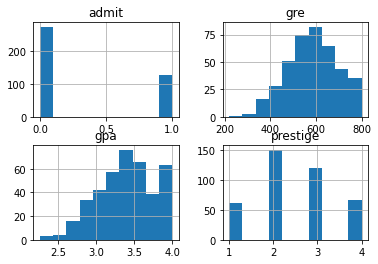

In [25]:
# plot all of the columns
df.hist()
pl.show()

 ### dummy variables
pandas gives you a great deal of control over how categorical variables can be represented. We're going dummify the "prestige" column using get_dummies.

get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified. In this case, prestige has four levels: 1, 2, 3 and 4 (1 being most prestigious). When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.

In [26]:
# dummify rank
dummy_ranks = pd.get_dummies(df["prestige"], prefix = "prestige")

In [27]:
# create a clean data frame for the regression
cols_to_keep = ["admit", "gre", "gpa"]
data = df[cols_to_keep].join(dummy_ranks.loc[:,"prestige_2":])
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [28]:
# manually add the intercept
data["intercept"]=1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


Once that's done, we merge the new dummy columns with the original dataset and get rid of the prestige column which we no longer need.

Lastly we're going to add a constant term for our logistic regression. The statsmodels function we would use requires intercepts/constants to be specified explicitly.

### Performing the regression
Actually doing the logistic regression is quite simple. Specify the column containing the variable you're trying to predict followed by the columns that the model should use to make the prediction.

In our case we'll be predicting the admit column using gre, gpa, and the prestige dummy variables prestige_2, prestige_3 and prestige_4. We're going to treat prestige_1 as our baseline and exclude it from our fit. This is done to prevent multicollinearity, or the dummy variable trap caused by including a dummy variable for every single category.

In [29]:
train_cols=data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Since we're doing a logistic regression, we're going to use the statsmodels Logit function. For details on other models available in statsmodels, check out their docs here.

### Interpreting the results
One of my favorite parts about statsmodels is the summary output it gives. If you're coming from R, I think you'll like the output and find it very familiar too.

In [33]:
ironman = result.predict([800,4,0,0,0,1.0])

# Logistic Regression with scikit-learn



## Dataset

The dataset I chose is the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) that comes with [Statsmodels](http://statsmodels.sourceforge.net/). It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

## Problem Statement

I decided to treat this as a classification problem by creating a new binary variable `affair` (did the woman have at least one affair?) and trying to predict the classification for each woman.


## Import modules

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## Data Pre-Processing

First, let's load the dataset and add a binary `affair` column.

In [ ]:
# load dataset
dta = sm.datasets.fair.load_pandas().data
print(dta)

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

## Data Exploration

In [ ]:
dta.groupby('affair').mean()

We can see that on average, women who have affairs rate their marriages lower, which is to be expected. Let's take another look at the `rate_marriage` variable.

In [ ]:
dta.groupby('rate_marriage').mean()

An increase in `age`, `yrs_married`, and `children` appears to correlate with a declining marriage rating.

## Data Visualization

In [ ]:
# show plots in the notebook
%matplotlib inline

Let's start with histograms of education and marriage rating.

In [ ]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [ ]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

In [ ]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

In [ ]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

## Prepare Data for Logistic Regression

To prepare the data, I want to add an intercept column as well as dummy variables for `occupation` and `occupation_husb`, since I'm treating them as categorial variables. The dmatrices function from the [patsy module](http://patsy.readthedocs.org/en/latest/) can do that using formula language.

In [ ]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")
X.columns
#y.columns

The column names for the dummy variables are ugly, so let's rename those.

In [ ]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

We also need to flatten `y` into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [ ]:
# flatten y into a 1-D array
y = np.ravel(y)
dta

## Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [ ]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

73% accuracy seems good, but what's the null error rate?

In [ ]:
# what percentage had affairs?
y.mean()

Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn.

In [ ]:
# examine the coefficients
X.columns, np.transpose(model.coef_)

Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both, wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

## Model Evaluation Using a Validation Set

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [ ]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [ ]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

In [ ]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [ ]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

## Model Evaluation Using Cross-Validation

Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [ ]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

Looks good. It's still performing at 73% accuracy.

## Predicting the Probability of an Affair

Just for fun, let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated from college, has been married for 3 years. She has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [ ]:
X.columns

In [ ]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 30, 5, 2, 4,
                              16]]))

The predicted probability of an affair is 47%.